In [1]:
import numpy as np
import scipy.fftpack
import librosa
import os

In [5]:
audio_data, sample_rate = librosa.load('108-42.aiff')

In [6]:
# General settings
SAMPLE_FREQ = sample_rate # sample frequency in Hz
WINDOW_SIZE = 44100 # window size of the DFT in samples
WINDOW_STEP = 21050 # step size of window
WINDOW_T_LEN = WINDOW_SIZE / SAMPLE_FREQ # length of the window in seconds
SAMPLE_T_LENGTH = 1 / SAMPLE_FREQ # length between two samples in seconds

CONCERT_PITCH = 440
ALL_NOTES = ["A","A#","B","C","C#","D","D#","E","F","F#","G","G#"]

def find_closest_note(pitch):
  i = int(np.round(np.log2(pitch/CONCERT_PITCH)*12))
  closest_note = ALL_NOTES[i%12] + str(4 + (i + 9) // 12)
  closest_pitch = CONCERT_PITCH*2**(i/12)
  return closest_note, closest_pitch

In [7]:
# Load the audio file
audio_data = np.pad(audio_data, (0, WINDOW_SIZE - len(audio_data) % WINDOW_SIZE), 'constant')

In [11]:
# Split audio data into chunks of WINDOW_SIZE
chunks = np.split(audio_data, len(audio_data) / WINDOW_SIZE)

In [13]:
maxFreq_list = []

# Process each chunk
for windowSamples in chunks:
  magnitudeSpec = abs(scipy.fftpack.fft(windowSamples)[:len(windowSamples)//2])

  for i in range(int(62/(SAMPLE_FREQ/WINDOW_SIZE))):
    magnitudeSpec[i] = 0 #suppress mains hum

  maxInd = np.argmax(magnitudeSpec)
  maxFreq = maxInd * (SAMPLE_FREQ/WINDOW_SIZE)
  closestNote, closestPitch = find_closest_note(maxFreq)

  os.system('cls' if os.name=='nt' else 'clear')
  print(f"Closest note: {closestNote} {maxFreq:.1f}/{closestPitch:.1f}")

  maxFreq_list.append(maxFreq)


Closest note: E5 662.5/659.3
Closest note: F#4 373.0/370.0
Closest note: F#5 741.0/740.0
Closest note: D#5 620.0/622.3
Closest note: E5 662.5/659.3
Closest note: F#5 738.0/740.0
Closest note: E5 661.0/659.3
Closest note: F5 702.5/698.5
Closest note: F#5 742.0/740.0
Closest note: E5 661.0/659.3
Closest note: F#4 370.5/370.0
Closest note: D#5 615.5/622.3
Closest note: E5 656.0/659.3
Closest note: C5 520.0/523.3
Closest note: E4 330.0/329.6
Closest note: E5 654.0/659.3
Closest note: C4 260.5/261.6
Closest note: D5 586.5/587.3
Closest note: E4 330.0/329.6
Closest note: D#5 619.0/622.3
Closest note: C4 260.0/261.6
Closest note: D#5 620.0/622.3
Closest note: E5 650.5/659.3
Closest note: E5 660.5/659.3
Closest note: E5 654.5/659.3
Closest note: C5 521.5/523.3
Closest note: E5 651.5/659.3
Closest note: F#5 732.5/740.0
Closest note: D#5 617.5/622.3
Closest note: A6 1740.5/1760.0
Closest note: F#5 737.5/740.0
Closest note: A6 1741.0/1760.0
Closest note: F#5 731.5/740.0
Closest note: A4 441.0/440

In [14]:
import matplotlib.pyplot as plt

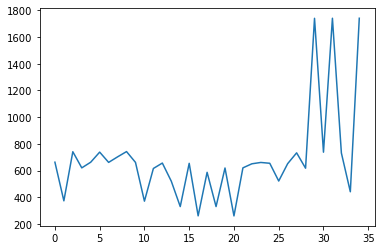

In [16]:
plt.plot(maxFreq_list)